In [ ]:
"""
Filename: visualizations.ipynb
Author: Kymberlee Hill
Purpose: To create visualizations of the USDA Thanksgiving day data we obtained from the API endpoint.
Visualizations we'll be focusing on in particular is: Line Plot
"""""

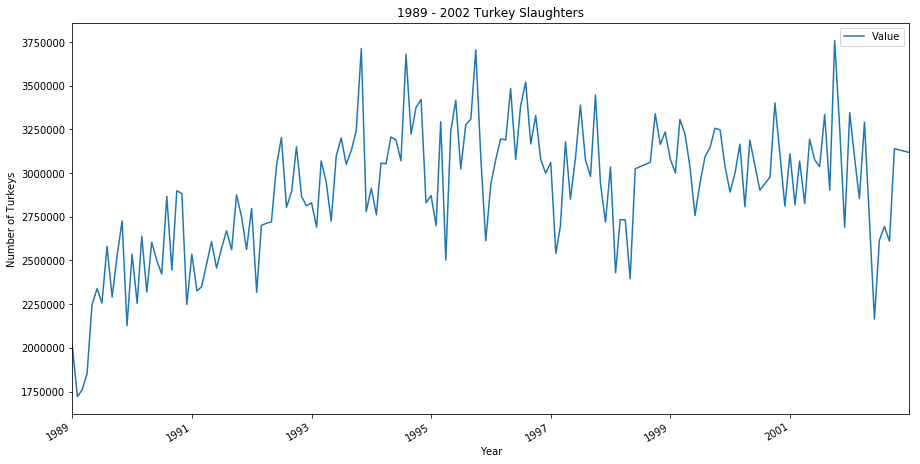

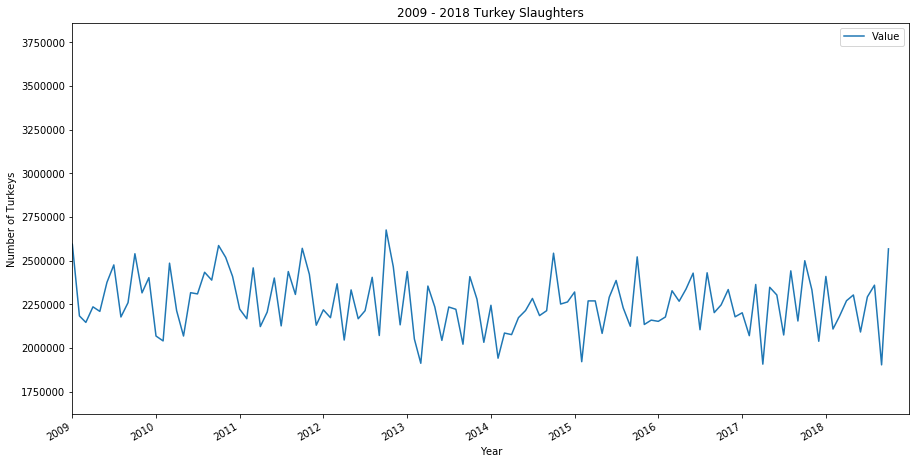

In [2]:
import os, sys, json, math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats

#create a line plot of the value for each month of our data set from 1989-2002 
def part2a(df):
    # add 'year' to 'reference period'(month) to get full date
    df['date'] = df['reference_period_desc'] + df['year'] 
    # 'date' string to date format
    df['date'] = pd.to_datetime(df['date'])
    # convert 'Value' column to float
    df['Value'] = df['Value'].apply(to_float)
    
    fig, ax = plt.subplots()
    df.plot(x='date', y='Value', style='-', figsize=(15,8), ax=ax,)
    plt.xlim(pd.Timestamp('1989-01-01'), pd.Timestamp('2002-12-31'))
    plt.title('1989 - 2002 Turkey Slaughters')
    plt.xlabel('Year')
    plt.ylabel('Number of Turkeys')
    plt.show()
    
    fig2, ax = plt.subplots()
    df.plot(x='date', y='Value', style='-', figsize=(15,8), ax=ax,)
    plt.xlim(pd.Timestamp('2009-01-01'), pd.Timestamp('2018-12-31'))
    plt.title('2009 - 2018 Turkey Slaughters')
    plt.xlabel('Year')
    plt.ylabel('Number of Turkeys')
    plt.show()
    
    return df

#turn num into a float
def to_float(x):
    num = x.replace(",", "")
    return float(num)

# read json file to dataframe
def to_dataframe(file_name):
    json_df = pd.read_json(os.getcwd() + "/" + file_name)
    # turn 'data' column into its own dataframe
    return json_df['data'].apply(pd.Series)

#driver file
if __name__ == "__main__":
    file = 'outputdata.json'
    df = to_dataframe(file)
    df = part2a(df)